# The Quantum Zeno Effect 

Hi there! I’m Maria, and I like transforming famous quantum thought experiments into quantum circuits using Qiskit. For the latest instalment of our Quantum Paradoxes content series, we’re investigating a quantum version of a thought experiment first developed by the ancient Greek philosopher Zeno of Elea: Zeno’s paradox.

In this notebook, I’ll show you how combining Zeno’s paradox with quantum theory allows us to “freeze” a qubit in a particular state. For more background on the original Zeno’s paradox, and the quantum version of it developed by University of Texas researchers George Sudarshan and Baidyanath Misra in 1997, be sure to read the [blog post](https://medium.com/qiskit/the-quantum-zeno-effect-from-motionless-arrows-to-entangled-freezers-e93beb7d52ae) that accompanies this notebook. 
We’ve also created a [video](https://youtu.be/vfUn8cR-eXw) on this topic that offers useful background on Zeno’s paradox, as well as an overview of everything we’ll be covering in this notebook.

## The Quantum Zeno Paradox (Recap)

Before we get started, let’s quickly review what we’re trying to accomplish by implementing the quantum Zeno effect as a quantum circuit. If you’ve already read our blog post (link), feel free to skip down to the next section. 

To review: Imagine you have a qubit that starts in the 1 state, representing the excited state of an atom before it decays, and it evolves over time to the 0 state, representing the ground state of an atom after it has decayed. If we measure the qubit after letting it evolve from the 1 state for a very short time, then it will be projected to the 1 state with a high probability. If we measure it again after another short time interval, it will again have a high probability of being projected into the 1 state. 

This is the quantum Zeno effect in a nutshell. It means that if we continuously measure the qubit, we can effectively freeze it in the 1 state. The shorter we make the time interval between measurements, the higher the probability will be that the qubit remains frozen in the 1 state. This has many useful applications in quantum computing.

## Qiskit implementation

To test this effect out in Qiskit, we can start by putting a qubit in the 1 state with the application of an X gate. Then we apply a series of X rotation gates to gradually rotate the 1 state to a 0 state:

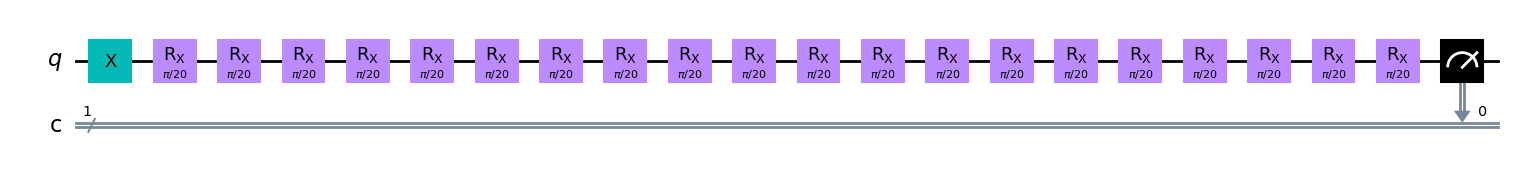

In [1]:
import qiskit
from qiskit import QuantumCircuit 
import numpy as np 
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.circuit.library import RXGate

time_steps = 20 # Choose the number of times to evolve the single qubit with a unitary gate 
theta = np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')
q_evolve = QuantumCircuit(qr, cr)

q_evolve.x(0)

for time_step in range(time_steps):
    q_evolve.append(RXGate(theta), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
    
q_evolve.measure(qr[0],cr[0])
q_evolve.draw("mpl")

When we measure the qubit after all the gates have been applied, it is deterministically in the 0 state.

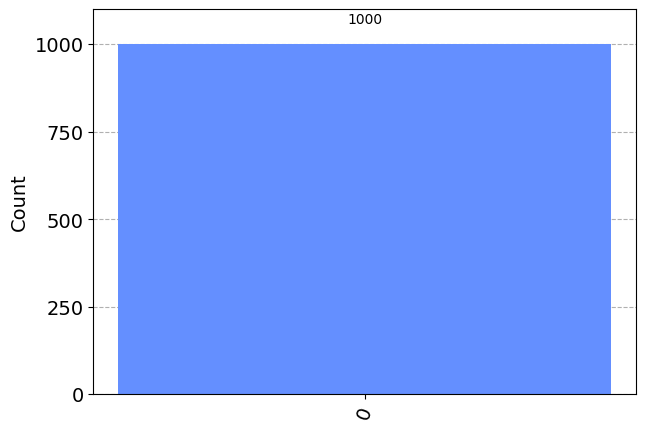

In [2]:
from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(q_evolve, shots=1000)
result = job.result()
counts = result.get_counts(q_evolve)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

We can plot the evolution of this state over time by checking the probability of getting a 1 after each rotation gate. 

Text(0.5, 1.0, 'Evolution of state without Zeno effect')

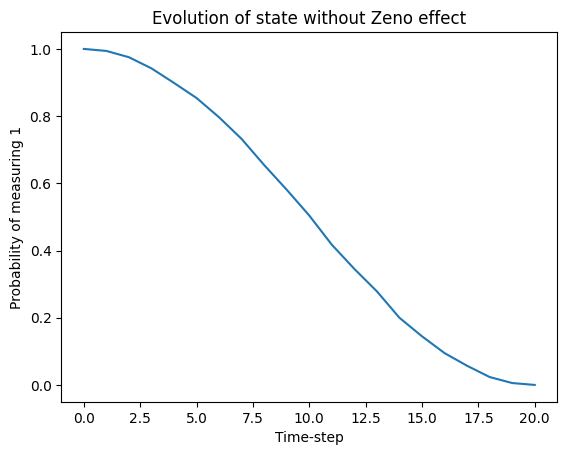

In [3]:
import matplotlib.pyplot as plt

time_steps = 20

x_values = range(0,time_steps+1)
y_values = list()

for i in range(0,time_steps+1):
    
    theta = np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(1, 'c')
    q_evolve = QuantumCircuit(qr, cr)
    
    q_evolve.x(0)

    for time_step in range(i):
        q_evolve.append(RXGate(theta), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
        
    q_evolve.measure(qr[0],cr[0])
    
    shot_number=10000

    job = simulator.run(q_evolve, shots=shot_number)
    result = job.result()
    counts = result.get_counts(q_evolve)
    if '1' in counts:
        y_values.append(counts['1']/shot_number)
    else:
        y_values.append(0)
    
plt.plot(x_values, y_values)
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring 1')
plt.title('Evolution of state without Zeno effect')

If we don’t apply any measurements, the qubit will evolve from the 1 state to the 0 state after all the rotations. However, if we apply measurements between each rotation gate, then the qubit has a high probability of being projected back into the 1 state with each measurement. 

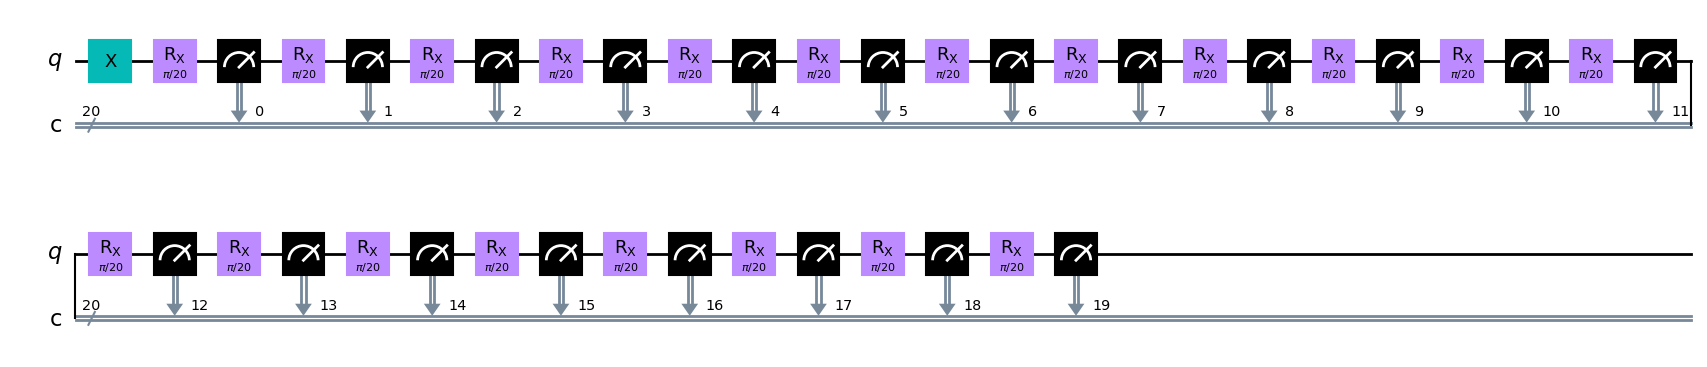

In [4]:
time_steps = 20
theta = np.pi/time_steps

qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(time_steps, 'c')
q_zeno = QuantumCircuit(qr, cr)

q_zeno.x(0)

for time_step in range(time_steps):
    q_zeno.append(RXGate(theta), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
    q_zeno.measure(qr[0],cr[time_step])
q_zeno.draw("mpl")

Let's compare how the state evolves now to how it evolved before. If we plot the probability of measuring a 1 against the number of rotation gates we might apply, with and without measurements after each rotation gate, we find the following two plots: 

Text(0.5, 1.0, 'Evolution of state with and without Zeno effect')

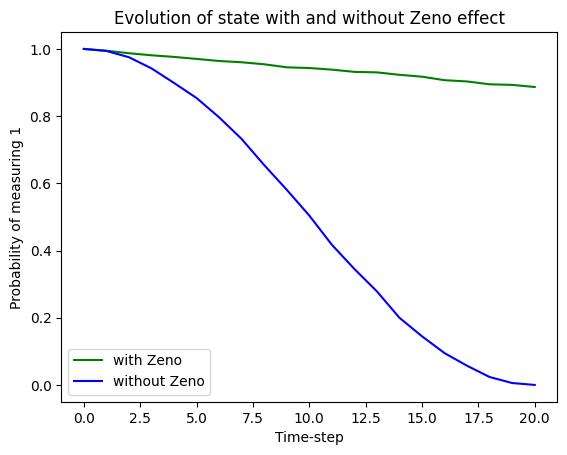

In [5]:
time_steps = 20

x_values_zeno = range(0,time_steps+1)
y_values_zeno = list()

for i in range(0,time_steps+1):
    
    theta = np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(1, 'c')
    q_zeno = QuantumCircuit(qr, cr)
    
    q_zeno.x(0)

    for time_step in range(i):
        q_zeno.measure(qr[0],cr[0])        
        q_zeno.append(RXGate(theta), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
        
    q_zeno.measure(qr[0],cr[0])
    
    shot_number=10000

    job = simulator.run(q_zeno, shots=shot_number)
    result = job.result()
    counts = result.get_counts(q_zeno)
    if '1' in counts:
        y_values_zeno.append(counts['1']/shot_number)
    else:
        y_values_zeno.append(0)
        
plt.plot(x_values_zeno, y_values_zeno, "g", label="with Zeno")
plt.plot(x_values, y_values,"b", label="without Zeno")
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring 1')
plt.legend()
plt.title('Evolution of state with and without Zeno effect')

Without the measurements, the qubit’s state evolves from 1 to 0 with each rotation gate. With the measurements, the qubit’s state has a high probability of remaining at 1, even after all the rotation gates. This shows us that the qubit’s state can be frozen by repeated measurements. 

To run our code on real hardware we need to import IBMQ and choose a device to run on, I'm going to use the 1-qubit Armonk device (note that this device is no longer available, but there are many other real devices which can be used). In our code we can just replace job = simulator.run(q_zeno, shots=shot_number) with job = execute(q_zeno,backend = device,shots = shot_number). I ran this code with and without the Zeno effect on Armonk earlier, and here is the output plot I got!

In [6]:
from qiskit import IBMQ, execute    
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_armonk')

#job = simulator.run(q_zeno, shots=shot_number)
job = execute(q_zeno,backend = device,shots = shot_number)


d:\_petrsu\quantum_computing\venv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  
d:\_petrsu\quantum_computing\venv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  


IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

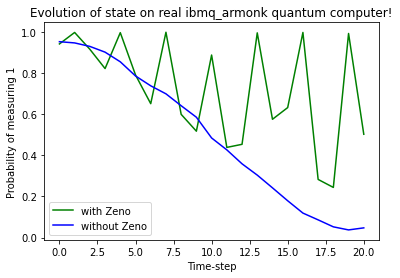

The probability of successfully freezing the qubit becomes greater the more frequent the measurements are. We can test this out using a quantum freezer game I created, where you can input the number of time-steps used (rotation gate followed by measurement) and the number of qubits you attempt to freeze. From there, the game outputs how many qubits you managed to successfully freeze. 

When I tried this with 100 qubits and 20 time-steps, I managed to freeze 85 qubits successfully, meaning 85 qubits ended up in the 1 state after all the time-steps. By increasing the number of time-steps, you can get the number of qubits successfully frozen more and more likely to be 100. 

In [ ]:
def quantum_freezer():
    qubits = int(input('Number of qubits? '))
    time_steps = int(input('Number of time-steps? '))
    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(time_steps, 'c')
    q_freezer = QuantumCircuit(qr, cr)
    theta = np.pi/time_steps
    
    q_freezer.x(0)

    for time_step in range(time_steps):
        q_freezer.append(RXGate(theta), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
        q_freezer.measure(qr[0],cr[time_step])
        
    from qiskit.providers.aer import QasmSimulator
    simulator = QasmSimulator()
    shot_number = qubits
    job = simulator.run(q_freezer, shots=shot_number)
    result = job.result()
    counts = result.get_counts(q_freezer)
    if "1"*time_steps in counts:
        print("You successfully froze",counts["1" * time_steps],"out of",qubits,"qubits!")
    else:
        print("You did not successfully freeze any qubits. Try increasing your timesteps! ")

In [ ]:
quantum_freezer()


Number of qubits? 100
Number of time-steps? 20
You successfully froze 85 out of 100 qubits!


## Code your own entangled freezer

Now we know how to freeze a qubit’s state, all we need to do is apply the right measurements to project the qubit into the state we want, and then we can freeze even multi-qubit, entangled states. I tested this out with the typical maximally entangled state between two qubits, the Bell state. 

My circuit starts by preparing the Bell state |00⟩ + |11⟩ using a Hadamard and a CNOT gate, and then a series of controlled-Z rotation gates, which rotate the state to the orthogonal Bell state, |00⟩ - |11⟩. At the end, I apply a Bell measurement, which is a CNOT followed by a Hadamard and two Z measurements, so we can identify from the outcome whether we have the |00⟩ + |11⟩ or |00⟩ - |11⟩ state. Applying the controlled-Z rotation gates without any intermediate measurements ensures that the final state is |00⟩ - |11⟩:

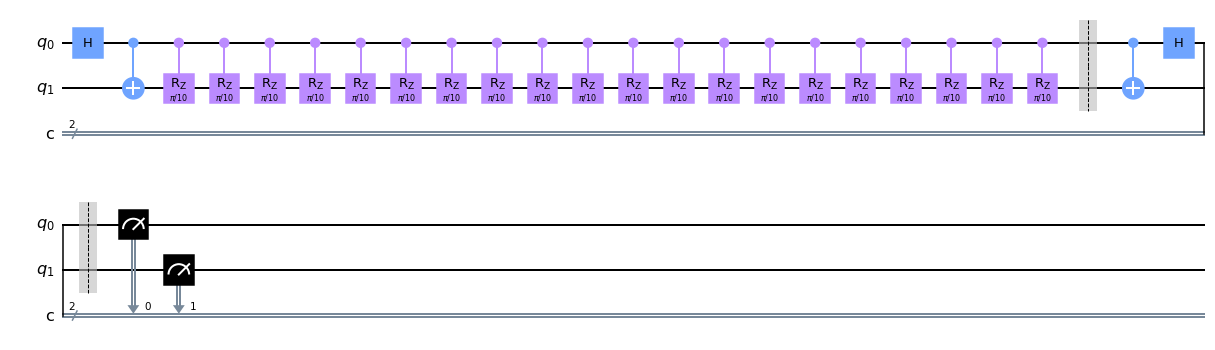

In [ ]:
from qiskit.circuit.library import CRZGate

time_steps = 20 # Choose the number of times to evolve the single qubit with a unitary gate 
theta = 2*np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
q_bell = QuantumCircuit(qr, cr)

q_bell.h(0)
q_bell.cx(0,1)

for time_step in range(time_steps):
    q_bell.append(CRZGate(theta), [qr[0],qr[1]]) # Add correct number of two-qubit gates to evolve the qubit's state

q_bell.barrier()
q_bell.cx(0,1)
q_bell.h(0)
q_bell.barrier()
q_bell.measure(qr,cr)
q_bell.draw("mpl")

Now let's simulate this circuit. We see the outcome says "01", indicating that after the CX and Hadamard, the qubits ended up in the |10> state. This means that before the CX and Hadamard, they were in the |00> - |11> state, orthogonal to the original Bell state |00> + |11>. 

Text(0.5, 1.0, 'Evolution of state without Zeno effect')

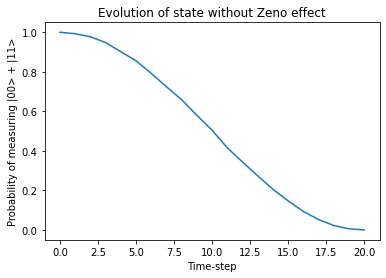

In [ ]:
from qiskit import execute

time_steps = 20

x_values = range(0,time_steps+1)
y_values = list()

for i in range(0,time_steps+1):
    
    theta = 2*np.pi/time_steps
    
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    q_bell = QuantumCircuit(qr, cr)

    q_bell.h(0)
    q_bell.cx(0,1)

    for time_step in range(i):
        q_bell.append(CRZGate(theta), [qr[0],qr[1]]) # Add correct number of two-qubit gates to evolve the qubit's state

    q_bell.barrier()
    q_bell.cx(0,1)
    q_bell.h(0)
    q_bell.barrier()
    q_bell.measure(qr,cr)

    shot_number=10000

    job = execute(q_bell,simulator,shots = shot_number)
    result = job.result()
    counts = result.get_counts(q_bell)
    if '00' in counts:
        y_values.append(counts['00']/shot_number)
    else:
        y_values.append(0)

plt.plot(x_values, y_values)
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring |00> + |11>')
plt.title('Evolution of state without Zeno effect')

However, if we apply intermediate Bell measurements after each rotation, and then re-prepare the Bell state the qubits were projected into, we find that the entangled qubits have a high probability of remaining in their original entangled state: 

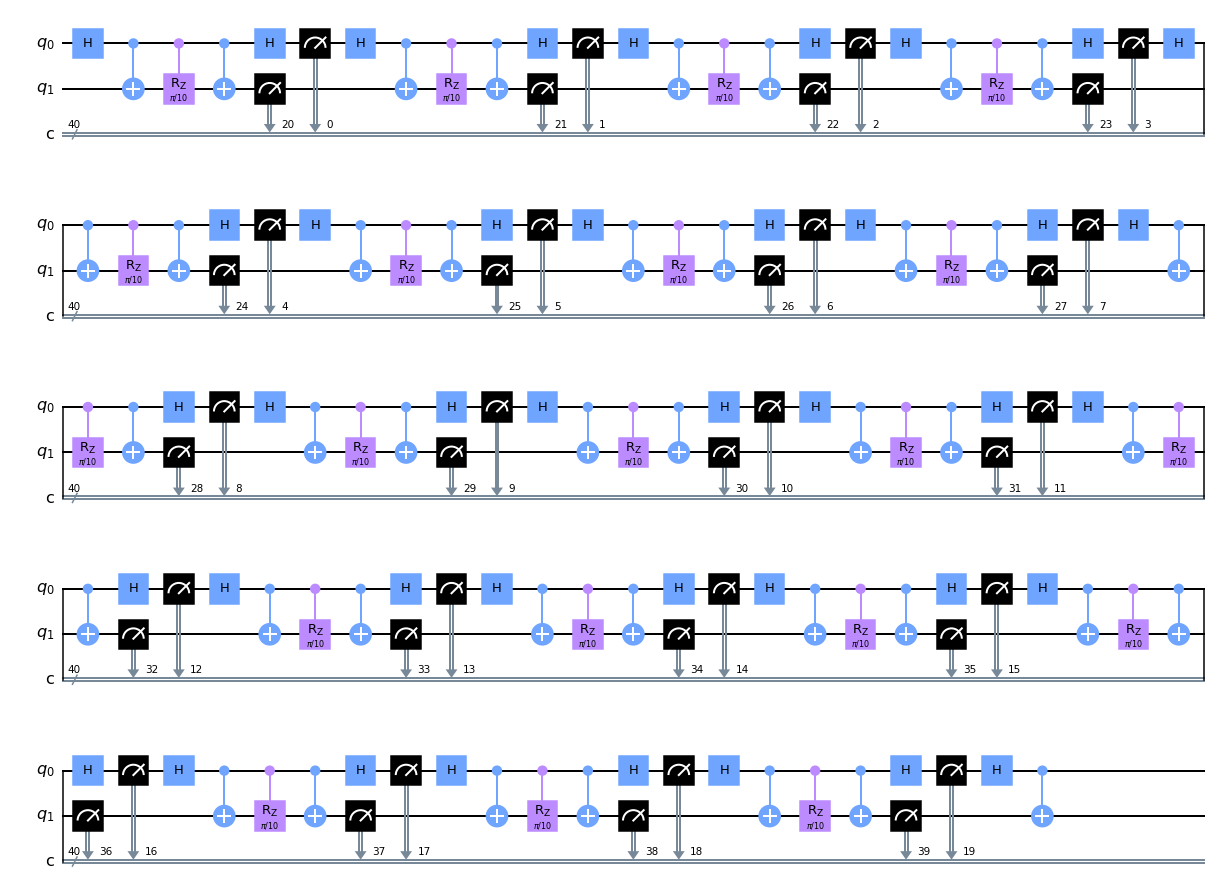

In [ ]:
time_steps = 20 # Choose the number of times to evolve the single qubit with a unitary gate 
theta = 2*np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2*time_steps, 'c')
q_bell_zeno = QuantumCircuit(qr, cr)

q_bell_zeno.h(0)
q_bell_zeno.cx(0,1)

for time_step in range(time_steps):
    q_bell_zeno.append(CRZGate(theta), [qr[0],qr[1]]) # Add correct number of two-qubit gates to evolve the qubit's state
    q_bell_zeno.cx(0,1)
    q_bell_zeno.h(0)
    q_bell_zeno.measure((qr[0],qr[1]), (cr[time_step],cr[time_step+time_steps]))
    q_bell_zeno.h(0)
    q_bell_zeno.cx(0,1)

q_bell_zeno.draw("mpl")

Let's see how the entangled state evolves with and without the quantum Zeno effect:

Text(0.5, 1.0, 'Evolution of state with and without Zeno effect')

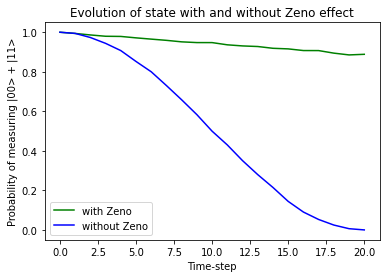

In [ ]:
time_steps = 20

x_values_zeno = range(0,time_steps+1)
y_values_zeno = list()

for i in range(0,time_steps+1):
    
    theta = 2*np.pi/time_steps
    
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    q_bell_zeno = QuantumCircuit(qr, cr)

    q_bell_zeno.h(0)
    q_bell_zeno.cx(0,1)
    
    for time_step in range(i):
        q_bell_zeno.append(CRZGate(theta), [qr[0],qr[1]]) # Add correct number of two-qubit gates to evolve the qubit's state
        q_bell_zeno.cx(0,1)
        q_bell_zeno.h(0)
        q_bell_zeno.measure(qr,cr)
        q_bell_zeno.h(0)
        q_bell_zeno.cx(0,1)
        
    q_bell_zeno.barrier()
    q_bell_zeno.cx(0,1)
    q_bell_zeno.h(0)
    q_bell_zeno.barrier()
    q_bell_zeno.measure(qr,cr)

    shot_number=10000

    job = execute(q_bell_zeno,simulator,shots = shot_number)
    result = job.result()
    counts = result.get_counts(q_bell_zeno)
    if '00' in counts:
        y_values_zeno.append(counts['00']/shot_number)
    else:
        y_values_zeno.append(0)
        
plt.plot(x_values_zeno, y_values_zeno, "g", label="with Zeno")
plt.plot(x_values, y_values, "b", label="without Zeno")
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring |00> + |11>')
plt.legend()
plt.title('Evolution of state with and without Zeno effect')

So we can use the quantum Zeno effect to freeze entangled qubits!

Building an entangled quantum freezer game from this, the probability of freezing entangled qubits is the same as that for single qubits: 

In [ ]:
def entangled_quantum_freezer():
    qubits = int(input('Number of qubit pairs? '))
    time_steps = int(input('Number of time-steps? '))
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2*time_steps, 'c')
    entangled_freezer = QuantumCircuit(qr, cr)
    theta = 2*np.pi/time_steps
    
    entangled_freezer.h(0)
    entangled_freezer.cx(0,1)

    for time_step in range(time_steps):
        entangled_freezer.append(CRZGate(theta), [qr[0],qr[1]]) # Add correct number of single-qubit gates to evolve the qubit's state
        entangled_freezer.cx(0,1)
        entangled_freezer.h(0)
        entangled_freezer.measure(qr[0],cr[time_step])
        entangled_freezer.measure(qr[1],cr[time_step+time_steps])
        entangled_freezer.h(0)
        entangled_freezer.cx(0,1)
        
    from qiskit.providers.aer import QasmSimulator
    simulator = QasmSimulator()
    shot_number = qubits
    job = execute(entangled_freezer,simulator,shots = shot_number)
    result = job.result()
    counts = result.get_counts(entangled_freezer)
    if "00"*time_steps in counts:
        print("You successfully froze",counts["00" * time_steps],"out of",qubits,"pairs of entangled qubits!")
    else:
        print("You did not successfully freeze any qubits. Try increasing your timesteps! ")

In [ ]:
entangled_quantum_freezer()


Number of qubit pairs? 100
Number of time-steps? 20
You successfully froze 88 out of 100 pairs of entangled qubits!


For more on how this technique can be useful in quantum computing, be sure to read our [blog post](https://medium.com/qiskit/the-quantum-zeno-effect-from-motionless-arrows-to-entangled-freezers-e93beb7d52ae) and watch our latest [video](https://youtu.be/vfUn8cR-eXw) on the Qiskit YouTube channel. Let me know in the video comments if you’re able to successfully build your own entangled freezer! 